In [ ]:
'''Hello everyone!This is AKASH J
Intern at Codsoft,India.

I'm very thrilled to share my THIRD task at codsoft internship summer 2024.'''

#AUTHOR : AKASH J
#TASK NAME:CHURN PREDICTION
#3RD task in the list of tasks
#Task category : Machine learning
#DATE OF SUMMISION : 14 JULY 2024



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data=pd.get_dummies(data,columns=['Geography','Gender'])

In [ ]:
X=data.drop(columns=['RowNumber','CustomerId','Surname','Exited'])
y=data['Exited']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
print("\confusion matrix:")
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.1985

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.00      0.01      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.51      0.50      0.17      2000
weighted avg       0.71      0.20      0.07      2000

\confusion matrix:
[[   5 1602]
 [   1  392]]


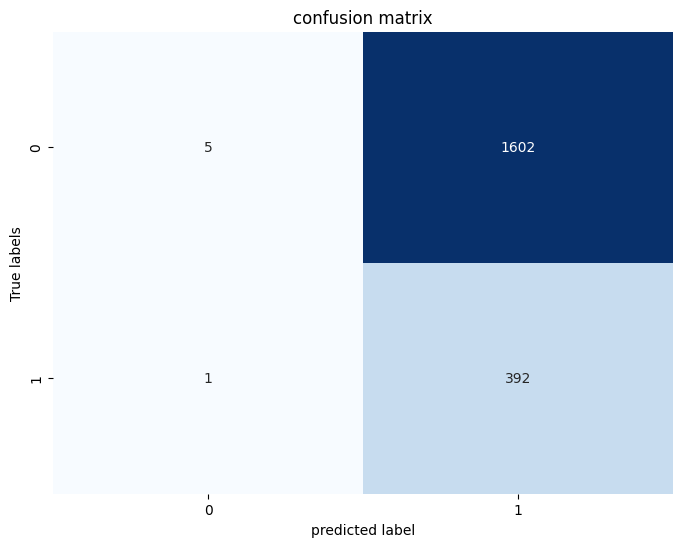

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel("predicted label")
plt.ylabel("True labels")
plt.title("confusion matrix")
plt.show()